# 2.2.1 Исследование взаимной диффузии газов

In [20]:
### t(s), V(mv)
### 1.902,15.33\n

import csv
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from matplotlib.pyplot import cm

DATA_DIR  = pathlib.Path('lab_data/')
FILENAMES = []
for item in DATA_DIR.iterdir():
    if item.is_file():
        FILENAMES.append(item.name)

20230202_1675333560905_201.4__200.csv
k = -0.0010934082311795535, b = 2.6819415289342987
tau = 914.5714944190735, U_0 = 14.613438183830317

20230202_1675332523142_156.7__160.csv
k = -0.001397278788980396, b = 2.6338594873017
tau = 715.6767911217681, U_0 = 13.927419003311462

20230202_1675328800205_48.5__40.csv
k = -0.004687381133080546, b = 2.7415181167078075
tau = 213.33874323609786, U_0 = 15.510514002462125

20230202_1675331532531_119.3__120.csv
k = -0.0017908606265207906, b = 2.6206420131172905
tau = 558.3907453159871, U_0 = 13.744544931201984

20230202_1675330722566_78.5__80.csv
k = -0.0029639828393739106, b = 2.536358765206254
tau = 337.38386967558574, U_0 = 12.633585267074913



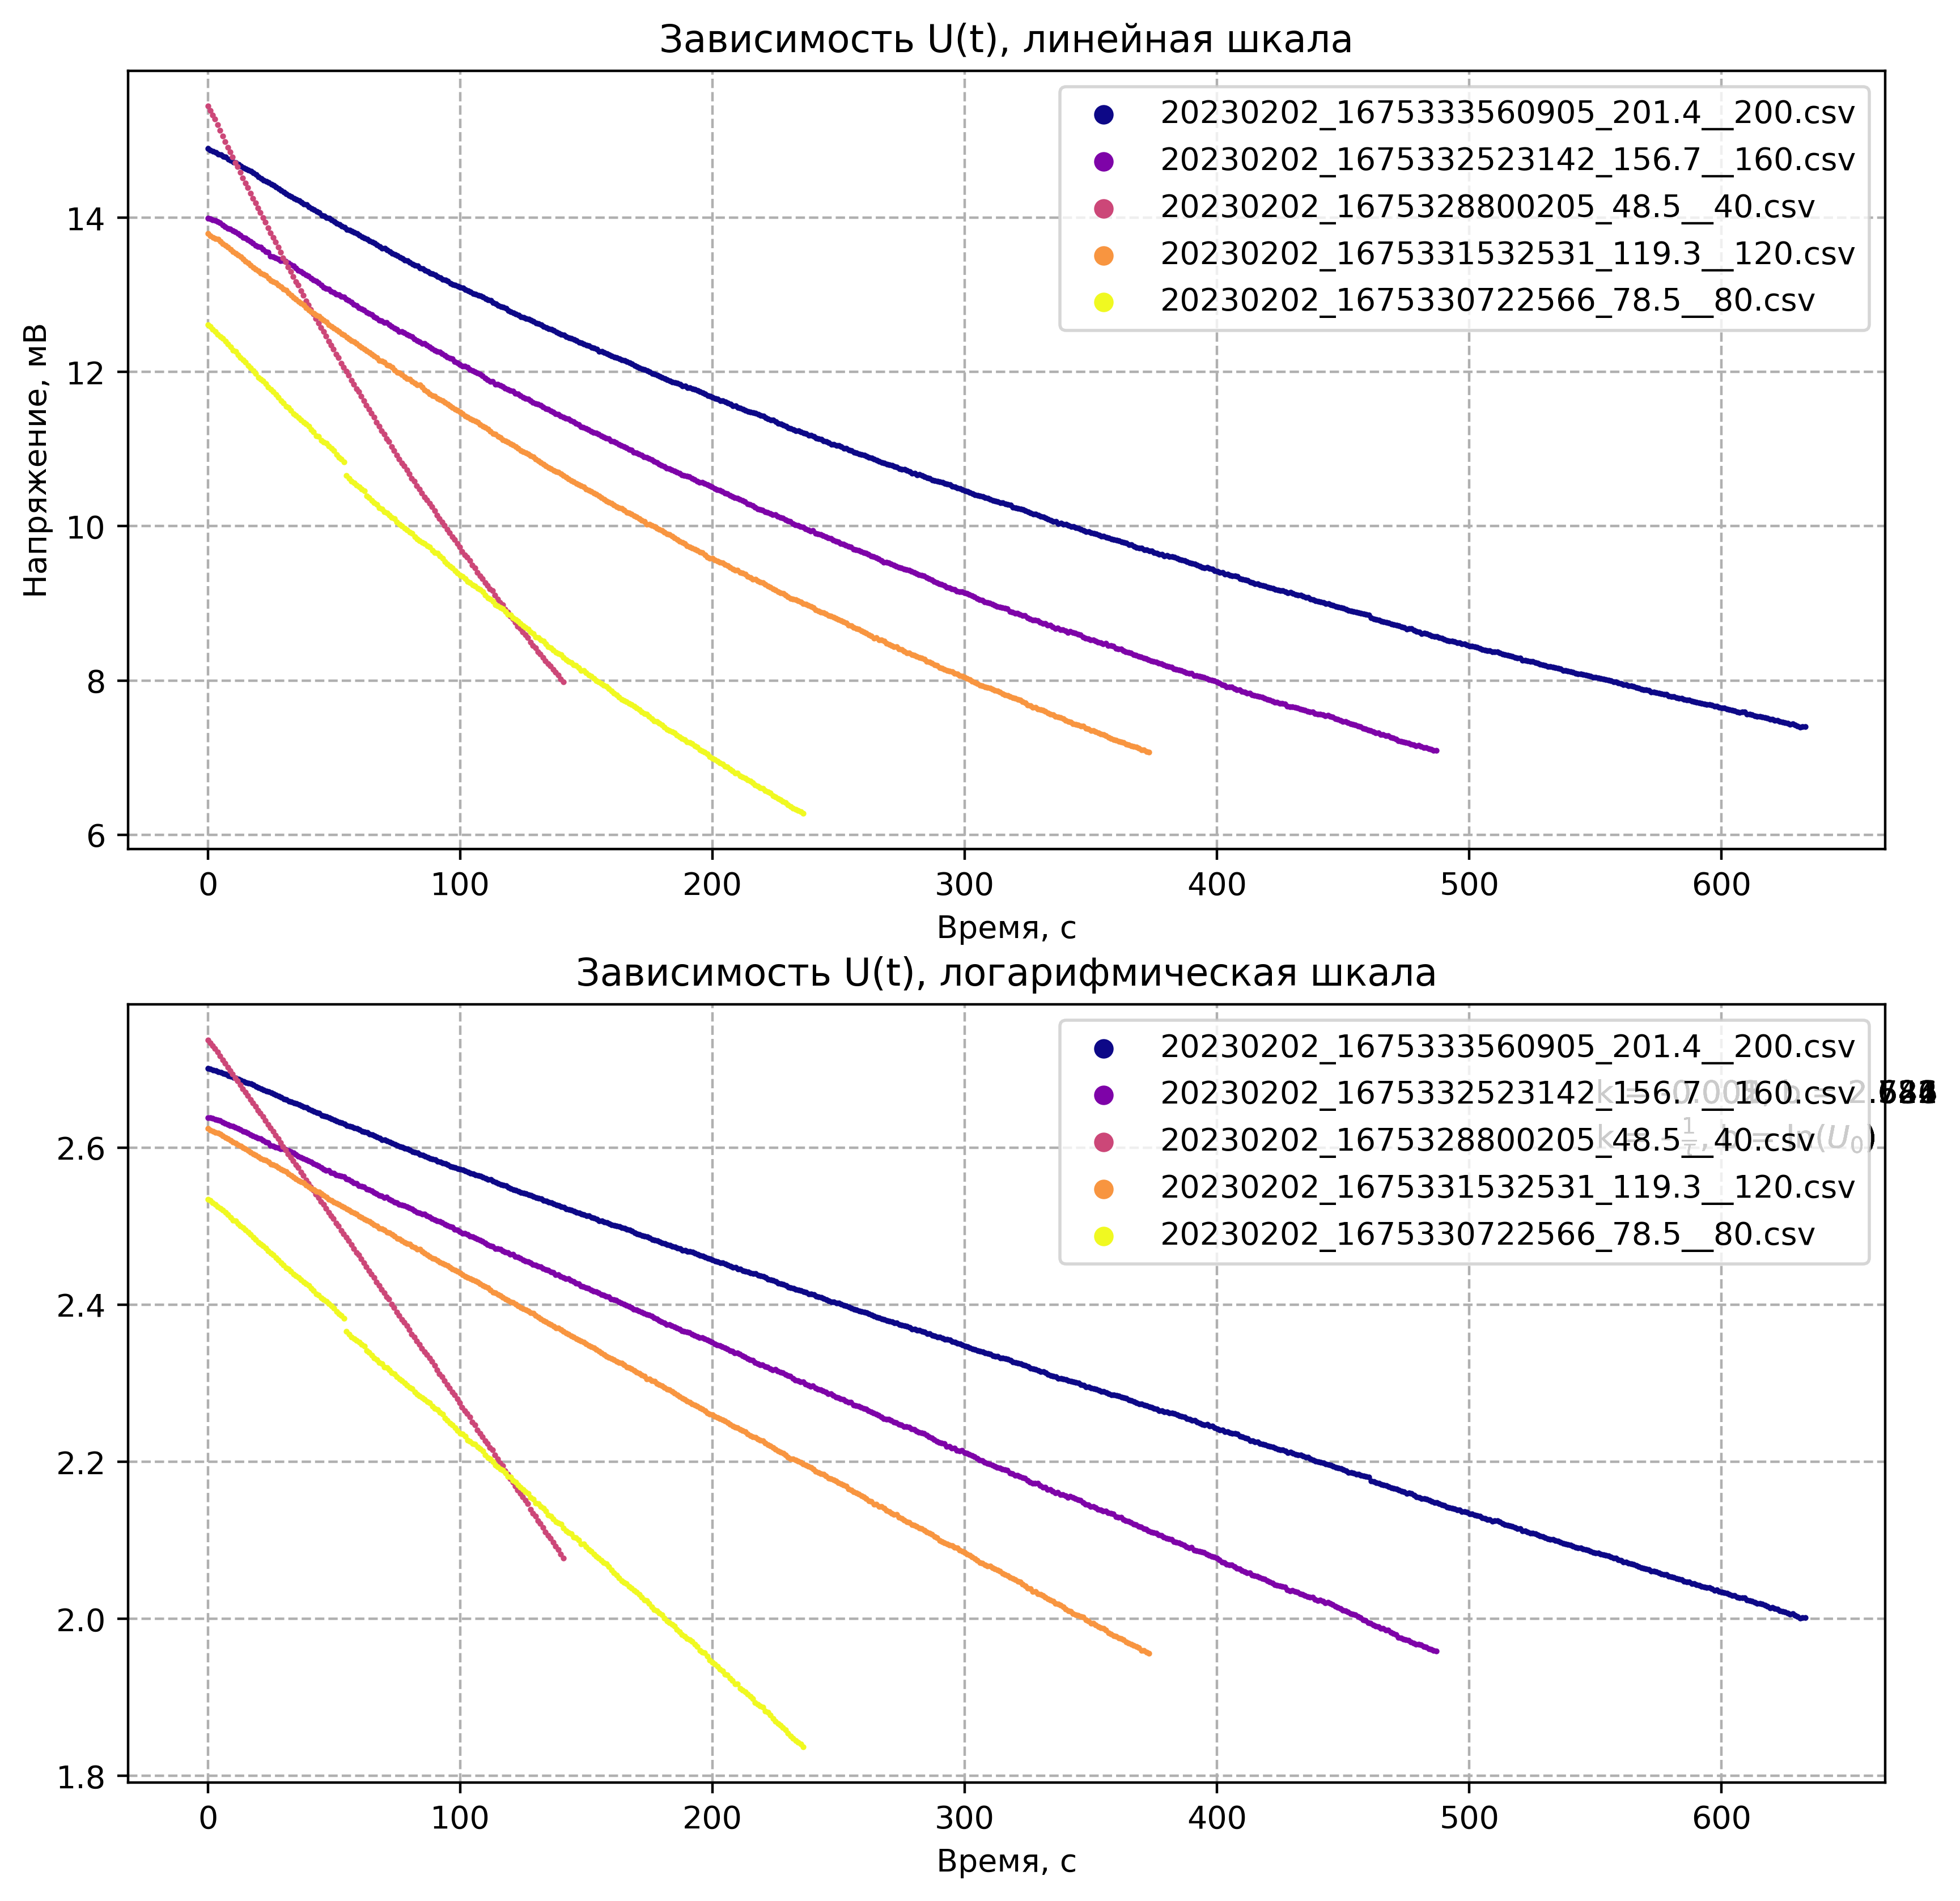

In [21]:
fig, axes = plt.subplots(2,1, figsize=(10,10), dpi=400)
ax = axes[0]
ax_log = axes[1]

### Косметика
ax.grid(which='major', linestyle='--')
ax_log.grid(which='major', linestyle='--')

ax.set_title('Зависимость U(t), линейная шкала')
ax.set_xlabel('Время, с')
ax.set_ylabel('Напряжение, мВ')

ax_log.set_title('Зависимость U(t), логарифмическая шкала')
ax_log.set_xlabel('Время, с')

n = len(FILENAMES)
color = iter(cm.plasma(np.linspace(0, 1, n)))

for filename in FILENAMES:    
    times, voltages = [], []
    with open('lab_data/' + filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        for row in reader:
            time    = row[0]
            voltage = row[1]
            times.append(float(time))
            voltages.append(float(voltage))

    times = np.array(times); voltages = np.array(voltages)

    c = next(color)
    ax.scatter(times, voltages, zorder=2, color=c, marker='.', s=3, label=filename)
    ax_log.scatter(times, np.log(voltages), zorder=2, color=c, marker='.', s=3, label=filename)

    (k, b) = np.polyfit(times, np.log(voltages), 1)
    # ax_log.plot(times, k * times + b, color='r', label=r'Аппроксимация ln(U) = k * t + b')
    ax_log.text(550, 2.6,f'k = {k:.3f}, b = {b:.3f}\n' + r'k = - $\frac{1}{\tau}$, b = ln($U_0$)')

    ax_log.legend(markerscale=6)
    ax.legend(markerscale=6)

    print(filename)
    print(f'k = {k}, b = {b}')
    print(f'tau = {-1 / k}, U_0 = {np.exp(b)}\n')

### Расчёт коэфф. диффузии
$$ D = \frac{LV}{2S\tau} $$